In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
import numpy as np
import pandas as pd

In [46]:
import datetime as dt
from datetime import datetime

In [47]:
from flask import Flask, jsonify
import csv


# Reflect Tables into SQLAlchemy ORM

In [48]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [49]:
n = automap_base()

In [50]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
n.prepare(engine)

y = Session(engine)

REFLECTING 'measurement' class AND MAKING A QUERY TO RETRIEVE THE LAST 12 MONTHS OF PRECIPITATION DATA

In [52]:
x1=n.classes.measurement

measurements=y.query(x1)


t1='2016-08-23'
d=[]
p=[]

for j in measurements:
         t=j.date 
         if t >= t1:
            d.append(j.date)
            p.append(j.prcp)

In [53]:
df1=pd.DataFrame(p,d)
df1.index.name='Date'
df1.columns=['Prcp']
df1

,Prcp
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


BAR PLOT OF PRECIPITATION FROM 23/08/2016 TO 24/08/2017

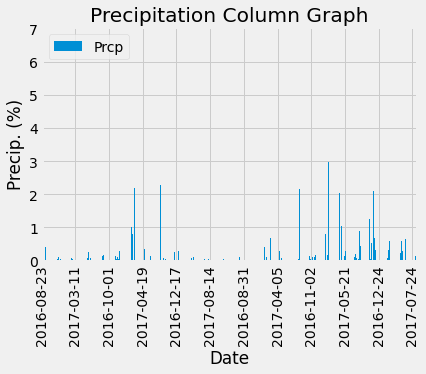

In [54]:
df1.plot.bar()
plt.title('Precipitation Column Graph')
plt.ylabel('Precip. (%)')
plt.xticks(range(0,2230,200))
print()

SUMMARY STATISTICS FOR PRECIPITATION FROM 23/08/2016 TO 24/08/2017

In [55]:
df1[['Prcp']].describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


REFLECTING THE CLASS station INTO stations. AND CALCULATING THE NUMBER OF STATIONS

In [56]:
x2 = n.classes.station

In [57]:
stations=y.query(x2)
print('The number of stations is: ',stations.count())  

The number of stations is:  9


In [58]:
s=[]

for i in stations:
    s.append(i.station)
    

    
a=s[0]
a

'USC00519397'

MOST ACTIVE STATIONS QUERY IN DESCENDING ORDER

In [59]:
t2=[]
station_name=a
tobs=0

for j in measurements:
    if j.station != station_name:
        t2.append(tobs)
        station_name=j.station
        tobs=0
    else:
        tobs=tobs+j.tobs
 

t2.append(tobs)
s,t
df2=pd.DataFrame(t2,s)
df2.index.name='Station'
df2.columns=['tops']
df2.sort_values(by=['tops'],ascending=False)

,tops
Station,
USC00519397,203083.0
USC00519523,198882.0
USC00519281,198582.0
USC00513117,196848.0
USC00516128,185157.0
USC00514830,164804.0
USC00511918,141662.0
USC00517948,102392.0
USC00518838,37090.0


In [60]:
print(f'The most active Station is: {df2.iloc[0]} ')

The most active Station is: tops    203083.0
Name: USC00519397, dtype: float64 


# Histogram of last 12 months of TOBS

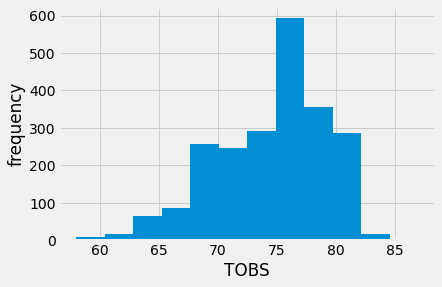

In [61]:
t3='2016-08-23'
tb2=[]
stns=[]

for j in measurements:
         t=j.date
         if t >= t3:
                tb2.append(j.tobs)
                stns.append(j.station)
                
plt.hist(tb2,bins=12)
plt.ylabel('frequency')
plt.xlabel('TOBS')
plt.show()

# Write Precipitation to output csv file

In [62]:
df1

,Prcp
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [63]:
precip1=df1.to_dict()

In [64]:
w = csv.writer(open("output.csv", "w"))

for key, val in precip1.items():
    w.writerow([key, val])

# Write stations to output2 csv file

In [65]:
stations_data=df2.to_dict()
stations_data

{'tops': {'USC00519397': 203083.0,
  'USC00513117': 196848.0,
  'USC00514830': 164804.0,
  'USC00517948': 102392.0,
  'USC00518838': 37090.0,
  'USC00519523': 198882.0,
  'USC00519281': 198582.0,
  'USC00511918': 141662.0,
  'USC00516128': 185157.0}}

In [66]:
w2 = csv.writer(open("output2.csv", "w"))

for key, val in stations_data.items():
    w2.writerow([key, val])

# Write Temperature observations of most active station in last year

In [67]:
df3=pd.DataFrame(tb2,stns)
df3.index.name='Station'
df3.columns=['tops']

df4=df3.groupby(by=["Station"]).mean()
df4.reset_index(inplace=True)
df4


,Station,tops
0,USC00513117,73.276968
1,USC00514830,77.160656
2,USC00516128,72.091691
3,USC00517948,74.781421
4,USC00519281,73.107955
5,USC00519397,75.210526
6,USC00519523,76.970326


In [68]:
station_name2=df4['Station'].max()
station_name2

'USC00519523'

In [69]:
date1=[]
tb3=[]

for j in measurements:
    t=j.date
    if t >= t3:
            if  j.station==station_name2:
                date1.append(j.date)
                tb3.append(j.tobs)

df5=pd.DataFrame(tb3,date1)
df5.columns=['tops']
df5

,tops
2016-08-23,80.0
2016-08-24,79.0
2016-08-25,80.0
2016-08-26,84.0
2016-08-27,81.0
...,...
2017-08-17,83.0
2017-08-19,85.0
2017-08-21,82.0
2017-08-22,82.0


In [70]:
temperature_data=df5.to_dict()


In [71]:
w3=csv.writer(open('output3.csv','w'))

for key,val in temperature_data.items():
    w3.writerow([key,val])

# Write Tmax, Tmin and Tavg to text file

In [72]:
t4='2017-08-09'
date2=[]
tb4=[]

for j in measurements:
    t=j.date
    if t>=t4:
        date2.append(j.date)
        tb4.append(j.tobs)

        
        
       

In [73]:
df6=pd.DataFrame(tb4,date2)
df6.columns=['tops']
Tmax=df6.max()
Tmin=df6.min()
Tavg=df6.mean()
Tmax,Tmin,Tavg

(tops    85.0
 dtype: float64,
 tops    70.0
 dtype: float64,
 tops    78.644068
 dtype: float64)

In [74]:
MX=Tmax[0]
MN=Tmin[0]
AVG=Tavg[0]
with open('myfile.text','w') as file1:
    file1.write(f'The maximum temperature is {MX}\
    \nThe minimum temperature is {MN}\
    \nThe average temperature is {AVG:.2f}') 